# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(100)
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


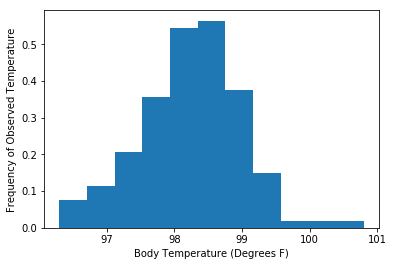

mean is: 98.24923076923075 median is: 98.3


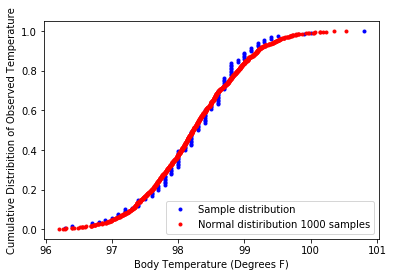

Question 2: n= 130


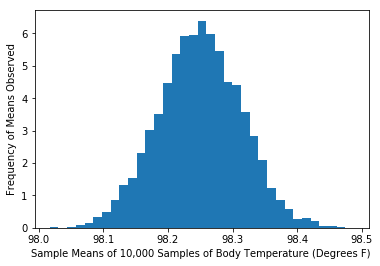

Question 3: p-value is:  0.0  for the null hypothesis that mean body temperature of the population = 98.6 degrees F
T-Stat:  -5.4548232923645195 The p-value for the null hypothesis that the mean body temperature of the population is 98.6 degrees F is:  2.4106320415561276e-07
Z-Stat:  5.4548232923645195 P-value: 2.4510785070506077e-08
Question 4: T-value:  -1.274208781094175  The p-value for the null hypothesis that the mean body temperature of the population is 98.6 degrees F is:  0.23450628404733792
Z-value:  1.1645316165324973  The p-value for the null hypothesis that the mean body temperature of the population is 98.6 degrees F is:  2.4510785070506077e-08
Question 5: 95% Confidence interval for sampling distribution of mean body temp:  98.12307692307692 - 98.3723076923077
95% Confidence interval for sample mean of body temp:  98.14345941596595 - 98.35500212249555
Question 6: Test Statistic: -2.2854345381656103 P-value: 0.02393188312239561


In [133]:
# Your work here.
# Question 1: 
bins = int(np.sqrt(len(df)))
plt.hist(df['temperature'], bins=bins,normed=True)
plt.xlabel('Body Temperature (Degrees F)')
plt.ylabel('Frequency of Observed Temperature')
plt.show()

sam_mean = np.mean(df['temperature'])
sam_stdev = np.std(df['temperature'],ddof = 1)
sam_median = np.median(df['temperature'])
print('mean is: ' + str(mean), 'median is: ' + str(median))

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / n
    return x, y
x,y=ecdf(df['temperature'])
normal_distribution = np.random.normal(sam_mean,sam_stdev,1000)
x_normal,y_normal = ecdf(normal_distribution)
plt.plot(x,y,marker='.',linestyle='none',color='blue',label = 'Sample distribution')
plt.plot(x_normal,y_normal,marker='.',linestyle='none',color='red',label='Normal distiribution 1000 samples')
plt.xlabel('Body Temperature (Degrees F)')
plt.ylabel('Cumulative Distribition of Observed Temperature')
plt.legend(loc='lower right')
plt.show()

# Question 2:
print('Question 2:', 'n=',len(df))

# Question 3:
bs_replicates = np.empty(10000)
for i in range(10000):
    resample = np.random.choice(df['temperature'],size=len(df['temperature']))
    bs_replicates[i] = np.mean(resample) 
plt.hist(bs_replicates, bins = 35, normed=True)
plt.xlabel('Sample Means of 10,000 Samples of Body Temperature (Degrees F) ')
plt.ylabel('Frequency of Means Observed')
plt.show()
p = np.sum(bs_replicates>=98.6)/len(bs_replicates)
print('Question 3:','p-value is: ', p,' for the null hypothesis that mean body temperature of the population = 98.6 degrees F')

t,p_ttest = stats.ttest_1samp(df['temperature'],98.6)
print('T-Stat: ',t,'The p-value for the null hypothesis that the mean body temperature of the population is 98.6 degrees F is: ', p_ttest)

z = (98.6-np.mean(df['temperature']))/(sam_stdev/np.sqrt(len(df['temperature'])))
p_ztest = stats.norm.cdf(-z)
print('Z-Stat: ',z,'P-value:', p_ztest)

# Question 4 
small_sample_10 = np.random.choice(df['temperature'], size=10)
t_small,p_small_t = stats.ttest_1samp(small_sample_10,98.6)
print('Question 4:','T-value: ',t_small,' The p-value for the null hypothesis that the mean body temperature of the population is 98.6 degrees F is: ', p_small_t)

z_small = (98.6-np.mean(small_sample_10))/(sam_stdev/np.sqrt(len(small_sample_10)))
p_small_z = stats.norm.cdf(-z)
print('Z-value: ',z_small,' The p-value for the null hypothesis that the mean body temperature of the population is 98.6 degrees F is: ', p_small_z)

# Question 5
bs_replicates = np.empty(10000)
for i in range(10000):
    resample = np.random.choice(df['temperature'],size=len(df['temperature']))
    bs_replicates[i] = np.mean(resample) 
lower,upper = np.percentile(bs_replicates,[2.5,97.5])
print('Question 5:','95% Confidence interval for sampling distribution of mean body temp: ',lower,'-',upper)

z = stats.norm.ppf(0.95)
standard_error = z*(sam_stdev/(np.sqrt(130)))
print('95% Confidence interval for sample mean of body temp: ',sam_mean - standard_error, '-', sam_mean+standard_error)

#Question 6 
m = df['gender'] == 'M'
f = df['gender'] == 'F'

t,p = stats.ttest_ind(df[m]['temperature'],df[f]['temperature'])
print('Question 6:','Test Statistic:', t, 'P-value:',p)

Question 1: The distribution of body temperatures in my sample appears to be normal. There were a couple of ways I came to this conclusion:
a. First I plotted a histogram of the body temperatures sample to check that it looked somewhat normal. It does.
b. In a normal distribution, the mean and the median are equal. Here we have a mean of 98.25 and a median of 98.3. These values  are close enough to confirm this essentially holds true for our sample.
c. I compared a plot of our sample's ECDF and a plot of the ECDF of a sample drawn from a normal distirbution with the same mean and standard deviation. The curves fit nicely together, showing that our sample is normally distiributed.
d. Intuitively, it makes sense that a biological process such as body temperature would be normally distributed. It is the sum of millions and millions of other processess taking place and as such should have central tendency.

Question 2: The sample size is sufficiently large (n=130) and observations are independent. 

Question 3: The true population mean does not appear to be 98.6 degrees F. The tests performed are below:
a. The bootstrap hypothesis test took 10,000 samples of size 130, with replacement, from our original sample of 130. The mean of each sample was taken and added to an array. These sample means were then plotted and a p-value was calculated. The null hypothesis was that the true population mean = 98.6 degress F, the alternative hypothesis was that the true population mean != 98.6 degrees F, and the signficance level was 0.01. For this bootstrap test, we got a p-value of 0.0. This means that of our 10,000 samples, not a single one had a mean of 98.6 degrees F or higher. Looking at the sampling distribution of the sample mean confirms this, showing a normal distribution centered around a mean of around 98.25. Given this result, we reject our null hypothesis in favor of our alternative hypothesis.
b. Given the same null and alternantive hypotheses given above, we also performed a one sample test with a t-statistic and a z-statistic. The one sample test is appropriate because we have a single sample and a 'known' population mean, and we want to see if the sample offers evidence to reject the given population mean. The one sample test also gives an extremely small p-value, confirming the conclusion reached in the bootstrap test. 
c/d. In this situation it is appropriate to use the z-statistic as the sample size is large enough. When you run the test with both statistics you see that the value of the test statistic is basically the same, -5.5. The difference comes in the interpretation to a p-value. The t-statistic obtains its p-value from a distribution that has larger tails, AKA more variance. Therefore, the p-value will be smaller (though not by much.) This holds true, where the p-value for the one sample t-test is e-7 and the the p-value for the one-sample z-test is e-8. Of course with such a low low p, this difference is totally inconsequential. 

Question 4: When we draw a small sample size of 10 (with replacement) from our orginal sample and run the same tests it is approproiate to use a t-statistic instead of a z-statistic. With only 10 observations in our sample, using a wider distribution makes more sense. When you run both tests again with the same null hypothesis, alternative hypothesis, and significance level, the t-test p-value is not signficant and we fail to reject the null hypothesis. With a z-test, significance is still achieved and the null hypothesis is rejected. It makes sense to use the t-stat because I think it would be inappropriate to draw a statistically significant conclusion off of only 10 observations of body temp.

Question 5: Using the bootstrap approach, a 95% confidence interval gives a body temp range of 98.13 - 98.38. Using a frequentist approach, the 95% confidence interval gives a body temp range of 98.14 - 98.36. Therefore we might expect an abnormal body temp to be outside that range, or x<98.13 or x>98.38.

Question 6: 2 sample test performed with null hypothesis that mean female body temp = mean male body temp, an alternative hypothesis that mean female body temp != mean male body temp, and a significance level of 0.05. P-value = 0.024, so we reject the null hypothesis. If men and women did have the same mean body temperature, we would expect to get a result this extreme in only 2.4% of repeated samples of n=65. Looking at this result in conjunction with the previously held belief that the mean body temp of the population is 98.6 degrees F, we may wonder whether the original study used a significantly higher proportion of women than is found in the population at large. Based on the result that women seem to have a higher body temperature, we might expect 98.6 degrees F to be a likely mean temperature in a population of only women. In a mixed population of men and women, however, this mean temperature lies outside the realm of possibility. 

In [120]:
df1 = df.groupby(['gender'],as_index=False).mean()
print(df1)

  gender  temperature  heart_rate
0      F    98.393846   74.153846
1      M    98.104615   73.369231


In [130]:
#Question 6 
m = df['gender'] == 'M'
f = df['gender'] == 'F'

t,p = stats.ttest_ind(df[m]['temperature'],df[f]['temperature'])
print(t,p)

-2.2854345381656103 0.02393188312239561
